# Método de la matriz inversa para la regresión lineal

$$Ax=b$$

$$A^TAx = A^Tb$$

$$x = (A^TA)^{-1}A^Tb$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#import tensorflow as tf
# Para que funcione con la version 2 instalada
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

session = tf.Session()

In [3]:
x_vals = np.linspace(0,10,100) # valores entre 10 y 100
y_vals = x_vals + np.random.normal(0,1,100) # le agregamos un poco de ruido aleatorio, valor que queremos predecir

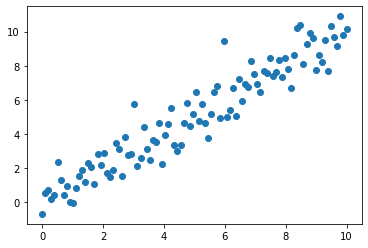

In [4]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")

In [7]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column, ones_column)) # en la pimera columna el valor de x y en la segunda 1
b = np.transpose(np.matrix(y_vals)) # valor que queremos predecir

In [9]:
# convertimos a tensores
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [10]:
# x = <vx

tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor) # multiplico: (𝐴t*𝐴)
tA_A_inv = tf.matrix_inverse(tA_A) # inversa: (𝐴t*𝐴)^−1
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor)) # (𝐴t*𝐴)^−1*𝐴t
solution = tf.matmul(product, b_tensor)
solution_eval = session.run(solution)

In [11]:
# me devuelve el valor de la pendiente de la recta y la ordenada del origen, la linea
solution_eval

array([[0.99780149],
       [0.08880256]])

In [13]:
slope = solution_eval[0][0]
intercept = solution_eval[1][0]
print(str(np.round(slope,3))+"x+"+str(np.round(intercept,3)))

# La ecuancion me queda 0.998x+0.089

0.998x+0.089


In [14]:
best_fit = []
for i in x_vals:
    # creamos la recta, x son valores de 10 a 100, al que le agregamos ruido es la y
    best_fit.append(slope*i+intercept)

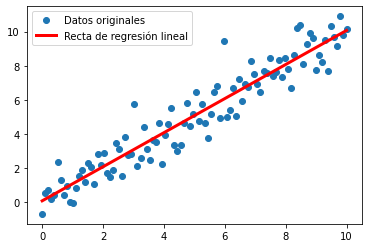

In [16]:
plt.plot(x_vals, y_vals, 'o', label = "Datos originales")
plt.plot(x_vals, best_fit, 'r-', label = "Recta de regresión lineal", linewidth = 3)
plt.legend(loc = "upper left")
plt.show()

# Método de la descomposición de Cholesky

$$A = LU$$
- $L$: matriz triangular superior
- $U$: matriz triangular inferior
- $L^T=U$

$$Ax=b$$

$$A^TAx=A^Tb$$

$$LUx=A^Tb$$

$$Ly=A^Tb$$
$$Ux=y$$

In [18]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [19]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [26]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A) # descomposicion, U no me hace falta calcularla porque es la traspuesta de L
tA_b = tf.matmul(tf.transpose(A_tensor), b_tensor)
y_sol = tf.matrix_solve(L, tA_b) # me resuelve la 'y' de la ecuacion Ly = 𝐴^t*𝑏
x_sol = tf.matrix_solve(tf.transpose(L), y_sol) # me resuelve la 'x' de la ecuacion Ux = y

In [28]:
sol_eval = session.run(x_sol)

In [29]:
sol_eval

array([[0.99780149],
       [0.08880256]])

In [30]:
slope = sol_eval[0][0]
intercept = sol_eval[1][0]
print(str(np.round(slope, 3))+"x+"+str(np.round(intercept,3)))

0.998x+0.089


In [33]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

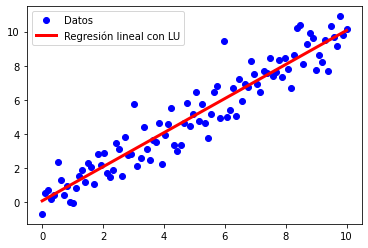

In [34]:
plt.plot(x_vals, y_vals, 'bo', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label = "Regresión lineal con LU", linewidth = 3)
plt.legend(loc="upper left")
plt.show()